# Principal Component for Speakers

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/pca-speaker](https://github.com/huseinzol05/malaya-speech/tree/master/example/pca-speaker).
    
</div>

<div class="alert alert-info">

This module is language independent, so it save to use on different languages. Pretrained models trained on multilanguages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
from malaya_speech import Pipeline
import malaya_speech
import numpy as np

### List available deep model

In [2]:
malaya_speech.speaker_vector.available_model()

,Size (MB),Quantized Size (MB),Embedding Size,EER
deep-speaker,96.7,24.40,512.0,0.218700
vggvox-v1,70.8,17.70,1024.0,0.139440
vggvox-v2,43.2,7.92,512.0,0.044600
speakernet,35.0,8.88,7205.0,0.300028
conformer-base,99.4,27.20,512.0,0.069380
conformer-tiny,20.3,6.21,512.0,0.086870


**Smaller EER the better model is**.

### Load deep model

```python
def deep_model(model: str = 'vggvox-v2', quantized: bool = False, **kwargs):
    """
    Load Speaker2Vec model.

    Parameters
    ----------
    model : str, optional (default='speakernet')
        Model architecture supported. Allowed values:

        * ``'vggvox-v1'`` - VGGVox V1, embedding size 1024, exported from https://github.com/linhdvu14/vggvox-speaker-identification
        * ``'vggvox-v2'`` - VGGVox V2, embedding size 512, exported from https://github.com/WeidiXie/VGG-Speaker-Recognition
        * ``'deep-speaker'`` - Deep Speaker, embedding size 512, exported from https://github.com/philipperemy/deep-speaker
        * ``'speakernet'`` - SpeakerNet, embedding size 7205, exported from https://github.com/NVIDIA/NeMo/tree/main/examples/speaker_recognition
        * ``'conformer-base'`` - Conformer BASE size, embedding size 512.
        * ``'conformer-tiny'`` - Conformer TINY size, embedding size 512.

    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result : malaya_speech.supervised.classification.load function
    """
```

In [3]:
model = malaya_speech.speaker_vector.deep_model('conformer-base')
model_vggvox = malaya_speech.speaker_vector.deep_model('vggvox-v2')

In [4]:
from glob import glob

speakers = glob('speech/example-speaker/*.wav')
speakers

['speech/example-speaker/haqkiem.wav',
 'speech/example-speaker/husein-generated.wav',
 'speech/example-speaker/khalil-nooh.wav',
 'speech/example-speaker/muhyiddin-yassin.wav',
 'speech/example-speaker/mas-aisyah.wav',
 'speech/example-speaker/female.wav',
 'speech/example-speaker/shafiqah-idayu.wav',
 'speech/example-speaker/husein-zolkepli.wav']

### Pipeline for Conformer base

In [5]:
def load_wav(file):
    return malaya_speech.load(file)[0]

p = Pipeline()
frame = p.foreach_map(load_wav).map(model)

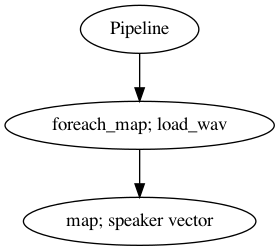

In [6]:
p.visualize()

### Pipeline for VGGVox V2

In [7]:
p_vggvox = Pipeline()
frame_vggvox = p_vggvox.foreach_map(load_wav).map(model_vggvox)

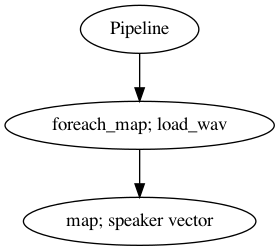

In [8]:
p_vggvox.visualize()

In [10]:
%%time

r = p(speakers)

CPU times: user 5.76 s, sys: 2.07 s, total: 7.83 s
Wall time: 1.56 s


In [11]:
%%time

r_vggvox = p_vggvox(speakers)

CPU times: user 28.7 s, sys: 7.72 s, total: 36.4 s
Wall time: 17.9 s


In [12]:
r['speaker-vector'].shape, r_vggvox['speaker-vector'].shape

((8, 512), (8, 512))

### Component Analysis for SpeakerNet

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
components = pca.fit_transform(r['speaker-vector'])

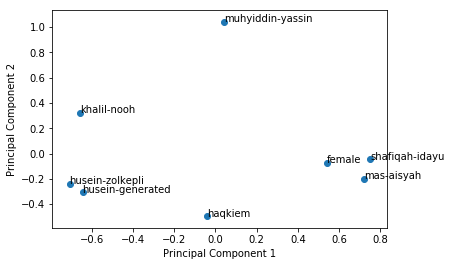

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(components[:, 0], components[:, 1])

for i, speaker in enumerate(speakers):
    speaker = speaker.split('/')[-1].replace('.wav', '')
    ax.annotate(speaker, (components[i, 0], components[i, 1]))
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Component Analysis for VGGVox V2

In [16]:
components = pca.fit_transform(r_vggvox['speaker-vector'])

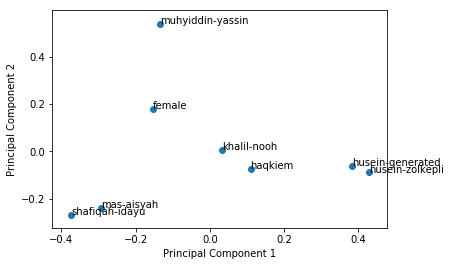

In [17]:
fig, ax = plt.subplots()
ax.scatter(components[:, 0], components[:, 1])

for i, speaker in enumerate(speakers):
    speaker = speaker.split('/')[-1].replace('.wav', '')
    ax.annotate(speaker, (components[i, 0], components[i, 1]))
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()